In [1]:
!pip install lightgbm

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [3]:
!pip install catboost

In [4]:


# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC

In [5]:
from google.colab import files
uploaded = files.upload()

Saving railway.csv to railway.csv


In [6]:
df = pd.read_csv("railway.csv")

df

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,4/30/2024,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,4/30/2024,20:00:00,20:30:00,20:30:00,On Time,NaN,No
31649,7da22246-f480-417c-bc2f,4/30/2024,18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,4/30/2024,20:15:00,21:35:00,21:35:00,On Time,NaN,No
31650,add9debf-46c1-4c75-b52d,4/30/2024,18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,Liverpool Lime Street,4/30/2024,20:15:00,20:45:00,20:45:00,On Time,NaN,No
31651,b92b047c-21fd-4859-966a,4/30/2024,19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,Birmingham New Street,4/30/2024,21:15:00,22:35:00,22:35:00,On Time,NaN,No


In [7]:
# load the first 5 rows
df.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,12/8/2023,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,12/16/2023,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,12/19/2023,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,12/20/2023,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,12/27/2023,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [8]:
# check for missing values
df.isnull().sum()

,0
Transaction ID,0
Date of Purchase,0
Time of Purchase,0
Purchase Type,0
Payment Method,0
Railcard,20918
Ticket Class,0
Ticket Type,0
Price,0
Departure Station,0


In [9]:
df.columns

Index(['Transaction ID', 'Date of Purchase', 'Time of Purchase',
       'Purchase Type', 'Payment Method', 'Railcard', 'Ticket Class',
       'Ticket Type', 'Price', 'Departure Station', 'Arrival Destination',
       'Date of Journey', 'Departure Time', 'Arrival Time',
       'Actual Arrival Time', 'Journey Status', 'Reason for Delay',
       'Refund Request'],
      dtype='object')

In [10]:
#  Drop irrelevant coloumns
df.drop(['Transaction ID','Railcard', 'Reason for Delay'], axis=1, inplace=True)

In [11]:
# check datatypes
df.dtypes

,0
Date of Purchase,object
Time of Purchase,object
Purchase Type,object
Payment Method,object
Ticket Class,object
Ticket Type,object
Price,int64
Departure Station,object
Arrival Destination,object
Date of Journey,object


In [12]:
# formating and imputation
df['Actual Arrival Time'] = pd.to_datetime(df['Actual Arrival Time'], errors='coerce')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Actual Arrival Time'] = df['Actual Arrival Time'].fillna(df['Arrival Time'])

In [13]:
df.head()

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Refund Request
0,12/8/2023,12:41:11,Online,Contactless,Standard,Advance,43,London Paddington,Liverpool Lime Street,1/1/2024,11:00:00,2025-09-09 13:30:00,2025-09-09 13:30:00,On Time,No
1,12/16/2023,11:23:01,Station,Credit Card,Standard,Advance,23,London Kings Cross,York,1/1/2024,9:45:00,2025-09-09 11:35:00,2025-09-09 11:40:00,Delayed,No
2,12/19/2023,19:51:27,Online,Credit Card,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,1/2/2024,18:15:00,2025-09-09 18:45:00,2025-09-09 18:45:00,On Time,No
3,12/20/2023,23:00:36,Station,Credit Card,Standard,Advance,13,London Paddington,Reading,1/1/2024,21:30:00,2025-09-09 22:30:00,2025-09-09 22:30:00,On Time,No
4,12/27/2023,18:22:56,Online,Contactless,Standard,Advance,76,Liverpool Lime Street,London Euston,1/1/2024,16:45:00,2025-09-09 19:00:00,2025-09-09 19:00:00,On Time,No


In [14]:
# feature Engineering
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'], errors='coerce')
df['Departure Time'] = pd.to_datetime(df['Departure Time'], errors='coerce')
df['Arrival Time'] = pd.to_datetime(df['Arrival Time'], errors='coerce')
df['Day of Week'] = df['Date of Journey'].dt.day_name()
df['Hour of Departure'] = df['Departure Time'].dt.hour
df['Day of Week'] = df['Date of Journey'].dt.day_name()
df['Month'] = df['Date of Journey'].dt.month_name()

In [15]:
# Delay Duration
df['Delay Duration'] = (df['Actual Arrival Time'] - df['Arrival Time']).dt.total_seconds() / 60

In [16]:
# Extract time features
df['Hour of Departure'] = df['Departure Time'].dt.hour
df['Time of Day'] = pd.cut(df['Hour of Departure'],
                           bins=[-1, 11, 16, 23],
                           labels=['Morning', 'Afternoon', 'Evening'])

In [17]:
# Show all columns
pd.set_option('display.max_columns', None)
df.head()

,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Refund Request,Day of Week,Hour of Departure,Month,Delay Duration,Time of Day
0,12/8/2023,12:41:11,Online,Contactless,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,2025-09-09 11:00:00,2025-09-09 13:30:00,2025-09-09 13:30:00,On Time,No,Monday,11,January,0.0,Morning
1,12/16/2023,11:23:01,Station,Credit Card,Standard,Advance,23,London Kings Cross,York,2024-01-01,2025-09-09 09:45:00,2025-09-09 11:35:00,2025-09-09 11:40:00,Delayed,No,Monday,9,January,5.0,Morning
2,12/19/2023,19:51:27,Online,Credit Card,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,2025-09-09 18:15:00,2025-09-09 18:45:00,2025-09-09 18:45:00,On Time,No,Tuesday,18,January,0.0,Evening
3,12/20/2023,23:00:36,Station,Credit Card,Standard,Advance,13,London Paddington,Reading,2024-01-01,2025-09-09 21:30:00,2025-09-09 22:30:00,2025-09-09 22:30:00,On Time,No,Monday,21,January,0.0,Evening
4,12/27/2023,18:22:56,Online,Contactless,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,2025-09-09 16:45:00,2025-09-09 19:00:00,2025-09-09 19:00:00,On Time,No,Monday,16,January,0.0,Afternoon


In [18]:
df.describe()

,Price,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Hour of Departure,Delay Duration
count,31653.000000,31653,31653,31653,31653,31653.000000,31653.000000
mean,23.439200,2024-03-01 08:01:10.969576192,2025-09-09 12:01:51.856695808,2025-09-09 12:29:17.966069504,2025-09-09 12:32:21.366695168,11.629830,3.056677
min,1.000000,2024-01-01 00:00:00,2025-09-09 00:00:00,2025-09-09 00:00:00,2025-09-09 00:00:00,0.000000,0.000000
25%,5.000000,2024-01-31 00:00:00,2025-09-09 07:00:00,2025-09-09 07:50:00,2025-09-09 07:50:00,7.000000,0.000000
50%,11.000000,2024-03-01 00:00:00,2025-09-09 12:00:00,2025-09-09 12:05:00,2025-09-09 12:20:00,12.000000,0.000000
75%,35.000000,2024-03-31 00:00:00,2025-09-09 17:45:00,2025-09-09 18:15:00,2025-09-09 18:20:00,17.000000,0.000000
max,267.000000,2024-04-30 00:00:00,2025-09-09 23:45:00,2025-09-09 23:50:00,2025-09-09 23:50:00,23.000000,180.000000
std,29.997628,NaN,NaN,NaN,NaN,6.147796,14.345747


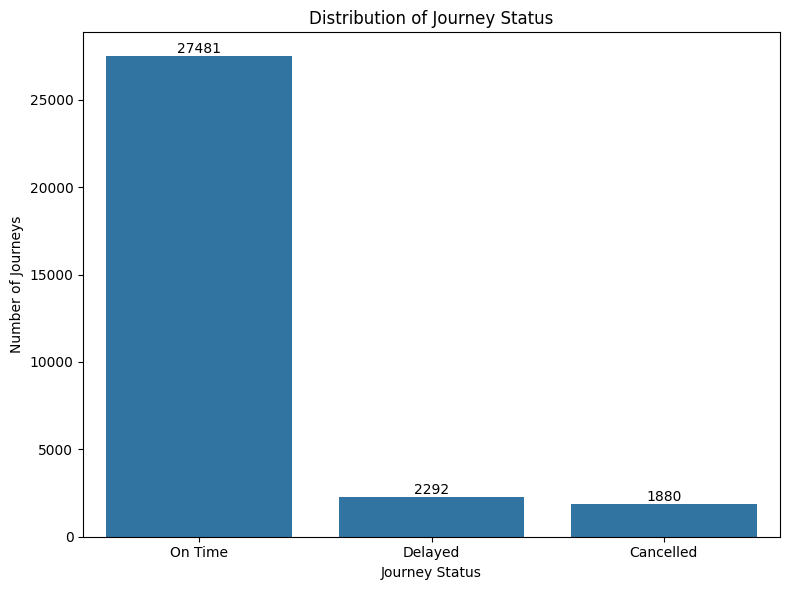

In [19]:

# Distribution of Journey status
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Journey Status', data=df)
plt.title('Distribution of Journey Status')
plt.xlabel('Journey Status')
plt.ylabel('Number of Journeys')

# Add data labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.tight_layout()
plt.show()


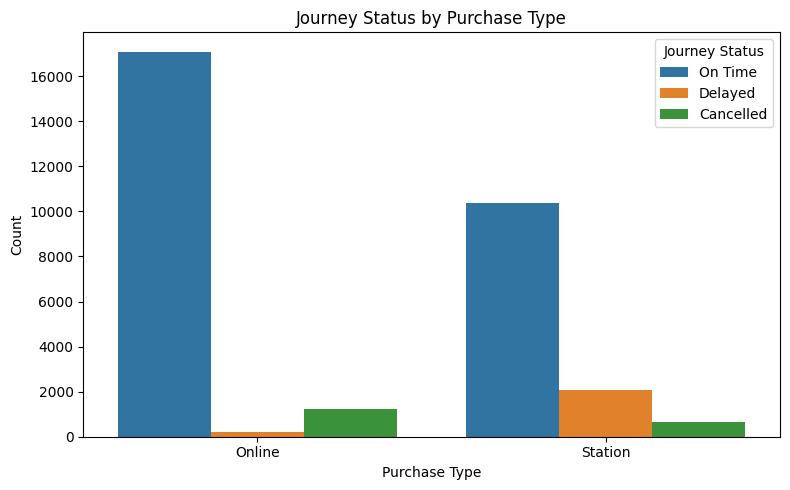

In [20]:
# Journey Status by Purchase Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Purchase Type', hue='Journey Status')
plt.title("Journey Status by Purchase Type")
plt.xlabel("Purchase Type")
plt.ylabel("Count")
plt.legend(title='Journey Status')
plt.tight_layout()
plt.show()

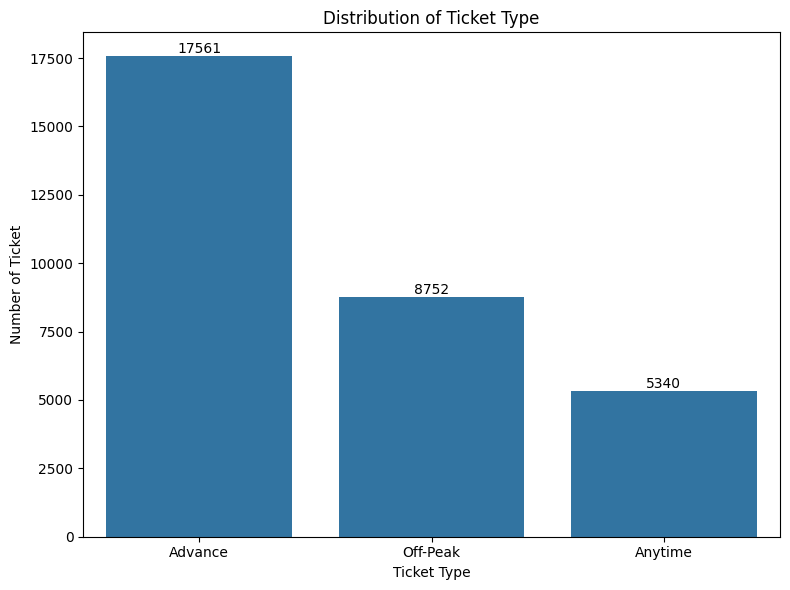

In [21]:
# Distribution by Ticket Type
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Ticket Type', data=df)
plt.title('Distribution of Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Ticket')

# Add data labels
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')

plt.tight_layout()
plt.show()

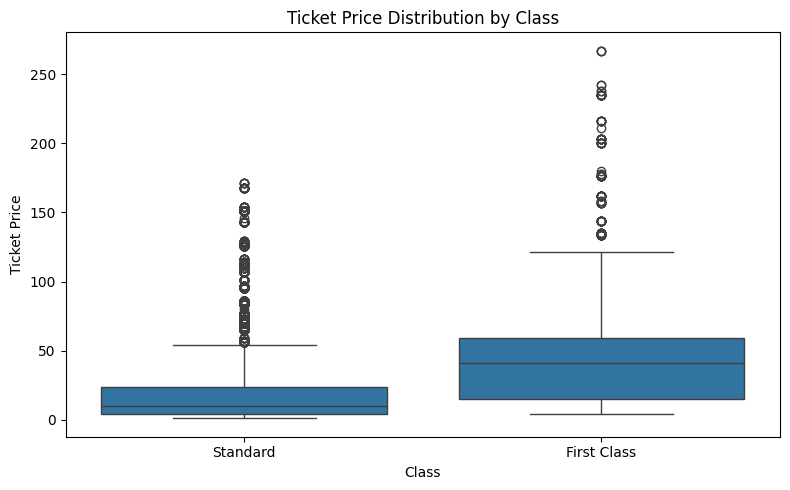

In [22]:

# Ticket Price Distribution by Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Ticket Class', y='Price')
plt.title("Ticket Price Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Ticket Price")
plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['Date of Purchase', 'Time of Purchase', 'Purchase Type',
       'Payment Method', 'Ticket Class', 'Ticket Type', 'Price',
       'Departure Station', 'Arrival Destination', 'Date of Journey',
       'Departure Time', 'Arrival Time', 'Actual Arrival Time',
       'Journey Status', 'Refund Request', 'Day of Week', 'Hour of Departure',
       'Month', 'Delay Duration', 'Time of Day'],
      dtype='object')

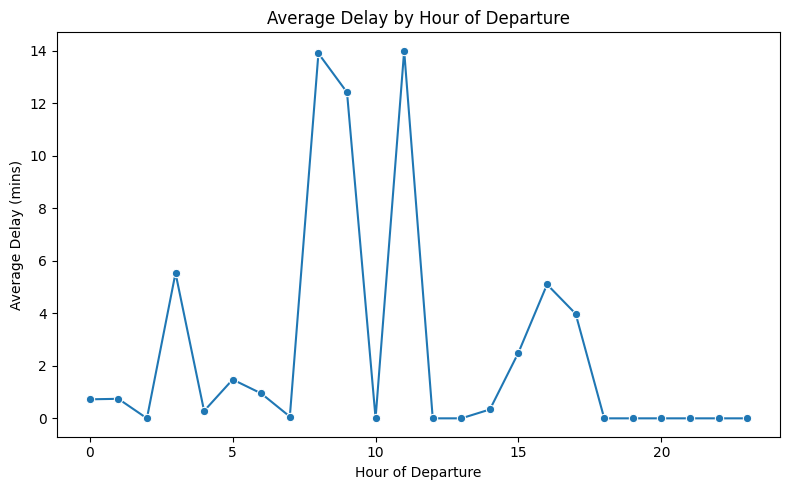

In [24]:
# Average Delay by Hour of Departure
df['Departure Hour'] = pd.to_datetime(df['Departure Time']).dt.hour
avg_delay = df.groupby('Departure Hour')['Delay Duration'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=avg_delay, x='Departure Hour', y='Delay Duration', marker='o')
plt.title("Average Delay by Hour of Departure")
plt.xlabel("Hour of Departure")
plt.ylabel("Average Delay (mins)")
plt.tight_layout()
plt.show()

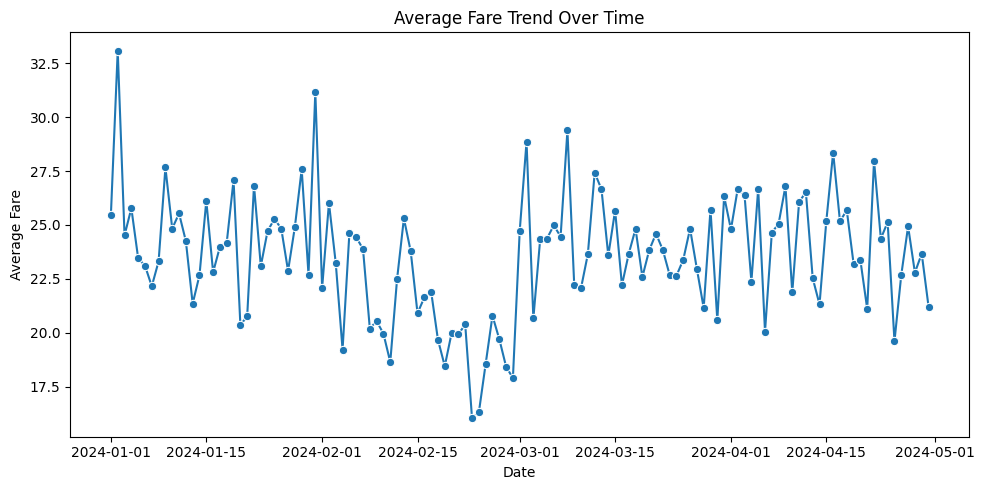

In [25]:
# Average Fare Trend Over Time
df['Date of Journey'] = pd.to_datetime(df['Date of Journey'])
avg_fare_time = df.groupby('Date of Journey')['Price'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_fare_time, x='Date of Journey', y='Price', marker='o')
plt.title("Average Fare Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Average Fare")
plt.tight_layout()
plt.show()

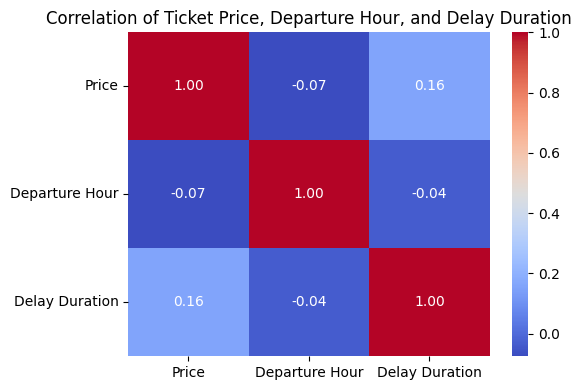

In [26]:
# Correlation: Price, Hour of Departure, and Delay Duration
corr_df = df[['Price', 'Departure Hour', 'Delay Duration']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Ticket Price, Departure Hour, and Delay Duration")
plt.tight_layout()
plt.show()

In [27]:
# Cap outliers using IQR method
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



df['Price_Capped'] = np.where(df['Price'] > upper_bound, upper_bound,
                              np.where(df['Price'] < lower_bound, lower_bound, df['Price']))

# Log transformation to reduce skew
df['Log_Price'] = np.log1p(df['Price_Capped'])

In [28]:
# Clean the Journey Status column before encoding
df['Journey Status'] = df['Journey Status'].str.lower().str.strip()

In [29]:
# label encoding
df['Journey Status'] = df['Journey Status'].map({
    'on time': 0,
    'delayed': 1,
    'cancelled': 2
})

In [30]:
# One-hot Encoding
categorical_cols = ['Ticket Class', 'Ticket Type', 'Payment Method', 'Purchase Type',
                    'Departure Station', 'Arrival Destination', 'Day of Week', 'Month', 'Time of Day']
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True)

In [31]:
df_encoded

,Ticket Class_Standard,Ticket Type_Anytime,Ticket Type_Off-Peak,Payment Method_Credit Card,Payment Method_Debit Card,Purchase Type_Station,Departure Station_Bristol Temple Meads,Departure Station_Edinburgh Waverley,Departure Station_Liverpool Lime Street,Departure Station_London Euston,Departure Station_London Kings Cross,Departure Station_London Paddington,Departure Station_London St Pancras,Departure Station_Manchester Piccadilly,Departure Station_Oxford,Departure Station_Reading,Departure Station_York,Arrival Destination_Bristol Temple Meads,Arrival Destination_Cardiff Central,Arrival Destination_Coventry,Arrival Destination_Crewe,Arrival Destination_Didcot,Arrival Destination_Doncaster,Arrival Destination_Durham,Arrival Destination_Edinburgh,Arrival Destination_Edinburgh Waverley,Arrival Destination_Leeds,Arrival Destination_Leicester,Arrival Destination_Liverpool Lime Street,Arrival Destination_London Euston,Arrival Destination_London Kings Cross,Arrival Destination_London Paddington,Arrival Destination_London St Pancras,Arrival Destination_London Waterloo,Arrival Destination_Manchester Piccadilly,Arrival Destination_Nottingham,Arrival Destination_Nuneaton,Arrival Destination_Oxford,Arrival Destination_Peterborough,Arrival Destination_Reading,Arrival Destination_Sheffield,Arrival Destination_Stafford,Arrival Destination_Swindon,Arrival Destination_Tamworth,Arrival Destination_Wakefield,Arrival Destination_Warrington,Arrival Destination_Wolverhampton,Arrival Destination_York,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Month_February,Month_January,Month_March,Time of Day_Afternoon,Time of Day_Evening
0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
2,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True
3,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
4,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [32]:
# Features for Service Efficiency
X_efficiency = pd.concat([df[['Hour of Departure', 'Delay Duration']], df_encoded], axis=1)

In [33]:
X_efficiency

,Hour of Departure,Delay Duration,Ticket Class_Standard,Ticket Type_Anytime,Ticket Type_Off-Peak,Payment Method_Credit Card,Payment Method_Debit Card,Purchase Type_Station,Departure Station_Bristol Temple Meads,Departure Station_Edinburgh Waverley,Departure Station_Liverpool Lime Street,Departure Station_London Euston,Departure Station_London Kings Cross,Departure Station_London Paddington,Departure Station_London St Pancras,Departure Station_Manchester Piccadilly,Departure Station_Oxford,Departure Station_Reading,Departure Station_York,Arrival Destination_Bristol Temple Meads,Arrival Destination_Cardiff Central,Arrival Destination_Coventry,Arrival Destination_Crewe,Arrival Destination_Didcot,Arrival Destination_Doncaster,Arrival Destination_Durham,Arrival Destination_Edinburgh,Arrival Destination_Edinburgh Waverley,Arrival Destination_Leeds,Arrival Destination_Leicester,Arrival Destination_Liverpool Lime Street,Arrival Destination_London Euston,Arrival Destination_London Kings Cross,Arrival Destination_London Paddington,Arrival Destination_London St Pancras,Arrival Destination_London Waterloo,Arrival Destination_Manchester Piccadilly,Arrival Destination_Nottingham,Arrival Destination_Nuneaton,Arrival Destination_Oxford,Arrival Destination_Peterborough,Arrival Destination_Reading,Arrival Destination_Sheffield,Arrival Destination_Stafford,Arrival Destination_Swindon,Arrival Destination_Tamworth,Arrival Destination_Wakefield,Arrival Destination_Warrington,Arrival Destination_Wolverhampton,Arrival Destination_York,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,Month_February,Month_January,Month_March,Time of Day_Afternoon,Time of Day_Evening
0,11,0.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
1,9,5.0,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
2,18,0.0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True
3,21,0.0,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
4,16,0.0,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,20,0.0,True,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False

In [34]:
# Target for Service Efficiency
y_efficiency = df['Journey Status']

In [35]:
df['Journey Status'].unique()

array([0, 1, 2])

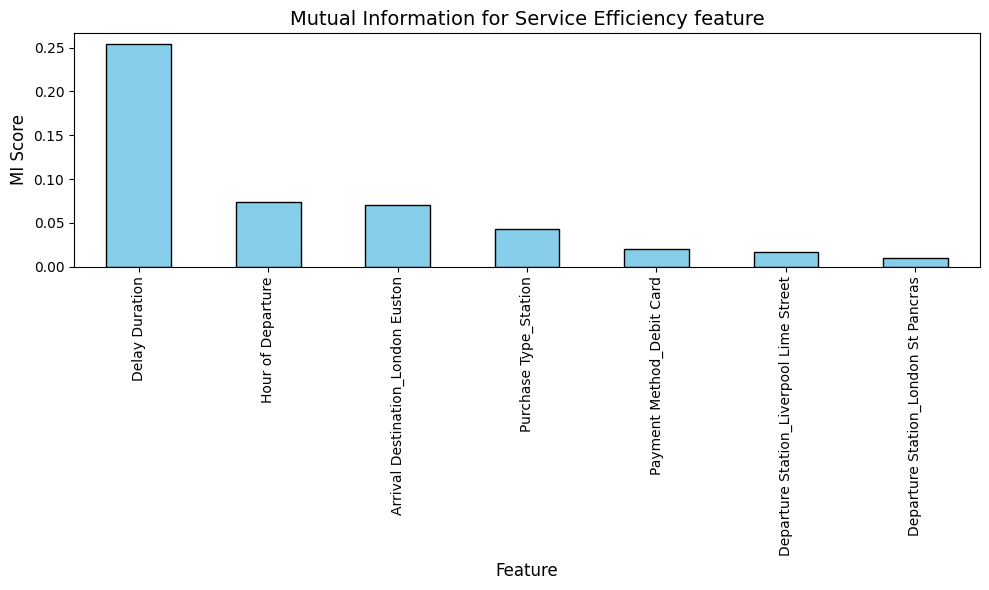

Selected Features based on MI: ['Delay Duration', 'Hour of Departure', 'Arrival Destination_London Euston', 'Purchase Type_Station', 'Payment Method_Debit Card', 'Departure Station_Liverpool Lime Street', 'Departure Station_London St Pancras']


In [36]:
# --- Mutual Information for Service Efficiency ---

# Calculate MI scores for all features
mi_scores = mutual_info_classif(X_efficiency, y_efficiency, discrete_features='auto', random_state=42)
mi_scores = pd.Series(mi_scores, index=X_efficiency.columns).sort_values(ascending=False)

# Select only the top N features (e.g., top 7 used)
top_features = mi_scores.head(7).index.tolist()

# Restrict MI scores to only those features
mi_selected = mi_scores[top_features]

# Plot only selected features
plt.figure(figsize=(10, 6))
mi_selected.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Mutual Information for Service Efficiency feature", fontsize=14)
plt.ylabel("MI Score", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

print("Selected Features based on MI:", top_features)


# Service Efficiency

In [37]:
#top 8 features for service efficiency
mi_selected

,0
Delay Duration,0.253714
Hour of Departure,0.073816
Arrival Destination_London Euston,0.070074
Purchase Type_Station,0.042647
Payment Method_Debit Card,0.020287
Departure Station_Liverpool Lime Street,0.016499
Departure Station_London St Pancras,0.009476


In [38]:
# Features and Target for Service Efficiency
X_efficiency = pd.concat([df[['Hour of Departure', 'Delay Duration']], df_encoded], axis=1)
y_efficiency = df['Journey Status']

In [39]:
# --- Train Test Split & Scaling ---
X_train, X_test, y_train, y_test = train_test_split(X_efficiency, y_efficiency, test_size=0.2, stratify=y_efficiency, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
# --- SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [41]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    """Plot confusion matrix separately."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['On Time', 'Delayed', 'Cancelled'],
                yticklabels=['On Time', 'Delayed', 'Cancelled'])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

def print_classification_report(y_true, y_pred, model_name):
    """Print accuracy and classification report separately."""
    print(f"\n{model_name} Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))


In [42]:
# Train and predict

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)
xgb_preds = xgb_model.predict(X_test_scaled)

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_resampled, y_resampled)
cat_preds = cat_model.predict(X_test_scaled)

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_resampled, y_resampled)
lgb_preds = lgb_model.predict(X_test_scaled)

svm_model = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_resampled, y_resampled)
svm_preds = svm_model.predict(X_test_scaled)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5541
[LightGBM] [Info] Number of data points in the train set: 65952, number of used features: 58
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


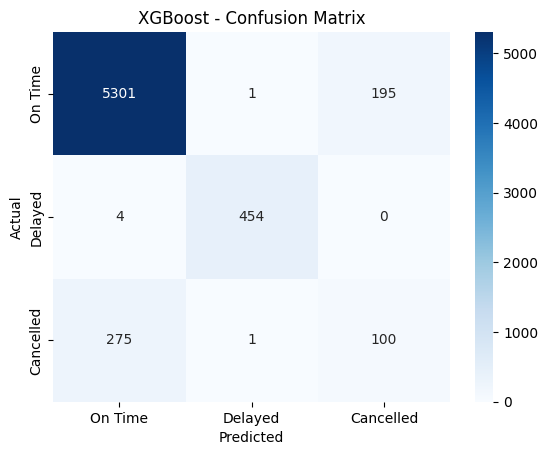

In [43]:
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")

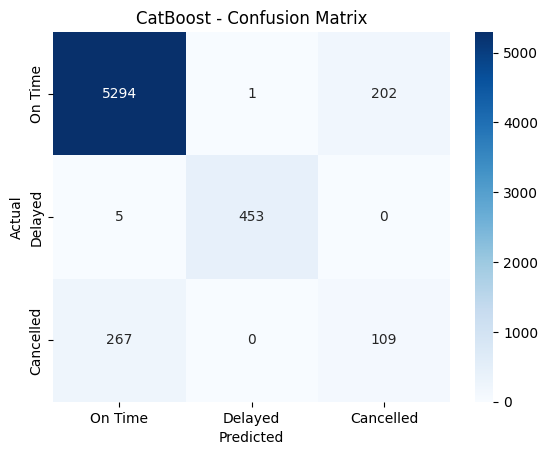

In [44]:
plot_confusion_matrix(y_test, cat_preds, "CatBoost")



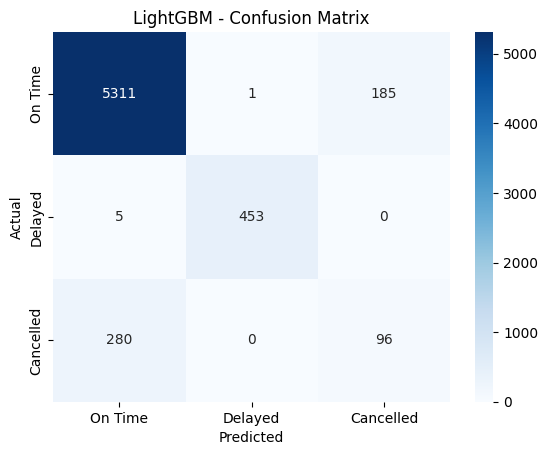

In [45]:
plot_confusion_matrix(y_test, lgb_preds, "LightGBM")

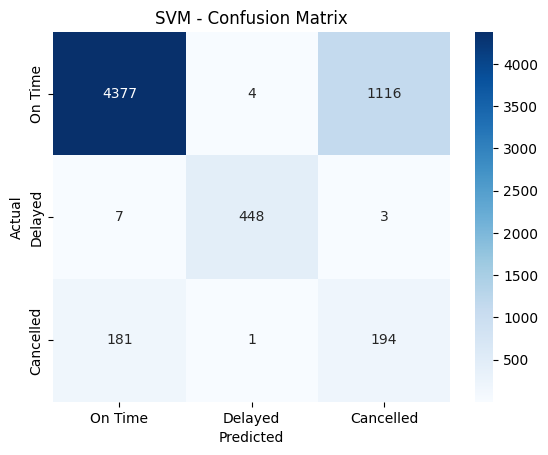

In [46]:
plot_confusion_matrix(y_test, svm_preds, "SVM")

In [47]:
print_classification_report(y_test, xgb_preds, "XGBoost")



XGBoost Accuracy: 0.9248144053072185
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5497
           1       1.00      0.99      0.99       458
           2       0.34      0.27      0.30       376

    accuracy                           0.92      6331
   macro avg       0.76      0.74      0.75      6331
weighted avg       0.92      0.92      0.92      6331



In [48]:
print_classification_report(y_test, cat_preds, "CatBoost")



CatBoost Accuracy: 0.9249723582372453
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5497
           1       1.00      0.99      0.99       458
           2       0.35      0.29      0.32       376

    accuracy                           0.92      6331
   macro avg       0.77      0.75      0.76      6331
weighted avg       0.92      0.92      0.92      6331



In [49]:
print_classification_report(y_test, lgb_preds, "LightGBM")



LightGBM Accuracy: 0.9256041699573527
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5497
           1       1.00      0.99      0.99       458
           2       0.34      0.26      0.29       376

    accuracy                           0.93      6331
   macro avg       0.76      0.74      0.75      6331
weighted avg       0.92      0.93      0.92      6331



In [50]:
print_classification_report(y_test, svm_preds, "SVM")


SVM Accuracy: 0.7927657558047702
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      5497
           1       0.99      0.98      0.98       458
           2       0.15      0.52      0.23       376

    accuracy                           0.79      6331
   macro avg       0.70      0.76      0.69      6331
weighted avg       0.91      0.79      0.84      6331



   # Price Prediction

In [51]:
df['Price']

,Price
0,43
1,23
2,3
3,13
4,76
...,...
31648,4
31649,10
31650,4
31651,10


In [52]:
# Target for Price Prediction
y_price = df['Price']

In [53]:
# Features for Price Prediction
X_efficiency = pd.concat([df[['Hour of Departure', 'Delay Duration']], df_encoded], axis=1)

In [54]:
# --- Feature Selection ---
mi_scores_price = mutual_info_classif(X_efficiency, y_price, discrete_features='auto')
mi_scores_price = pd.Series(mi_scores_price, index=X_efficiency.columns).sort_values(ascending=False)

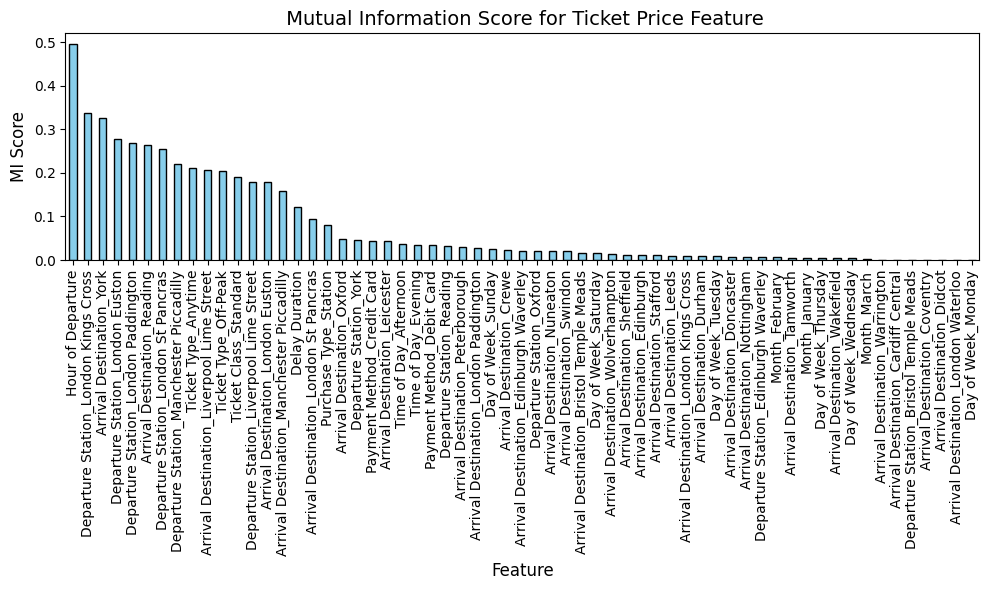

In [55]:
# Plot MI Scores for Price Prediction
plt.figure(figsize=(10, 6))
mi_scores_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(" Mutual Information Score for Ticket Price Feature", fontsize=14)
plt.ylabel("MI Score", fontsize=12)
plt.xlabel("Feature", fontsize=12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [56]:
# Top 18 important features
top_features = mi_scores_price.head(18).index.tolist()
print("Top 18 Features:", top_features)

Top 18 Features: ['Hour of Departure', 'Departure Station_London Kings Cross', 'Arrival Destination_York', 'Departure Station_London Euston', 'Departure Station_London Paddington', 'Arrival Destination_Reading', 'Departure Station_London St Pancras', 'Departure Station_Manchester Piccadilly', 'Ticket Type_Anytime', 'Arrival Destination_Liverpool Lime Street', 'Ticket Type_Off-Peak', 'Ticket Class_Standard', 'Departure Station_Liverpool Lime Street', 'Arrival Destination_London Euston', 'Arrival Destination_Manchester Piccadilly', 'Delay Duration', 'Arrival Destination_London St Pancras', 'Purchase Type_Station']


In [57]:
X_price_selected = X_efficiency[['Hour of Departure', 'Departure Station_London Kings Cross', 'Arrival Destination_York', 'Departure Station_London St Pancras', 'Departure Station_London Euston', 'Departure Station_London Paddington', 'Arrival Destination_Reading', 'Departure Station_Manchester Piccadilly', 'Ticket Type_Off-Peak', 'Ticket Type_Anytime', 'Arrival Destination_Liverpool Lime Street', 'Arrival Destination_London Euston', 'Ticket Class_Standard', 'Departure Station_Liverpool Lime Street', 'Arrival Destination_Manchester Piccadilly', 'Delay Duration', 'Arrival Destination_London St Pancras', 'Purchase Type_Station']]
X_train, X_test, y_train, y_test = train_test_split(X_price_selected, y_price, test_size=0.2, shuffle=False)

In [58]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [59]:
#  Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [60]:
# Polynomial Regression
poly_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('lin_reg', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [61]:
#  Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Polynomial Regression", y_test, y_pred_poly)


Lasso Regression Performance:
MAE: 11.09474579283194
MSE: 366.51816351605527
RMSE: 19.14466410037155
R2 Score: 0.6179837206818579

Ridge Regression Performance:
MAE: 11.116569973521232
MSE: 366.14038312341745
RMSE: 19.134795089663683
R2 Score: 0.6183774754104377

Polynomial Regression Performance:
MAE: 5.597329727953559
MSE: 138.74751536083116
RMSE: 11.779113521858559
R2 Score: 0.8553855856028819


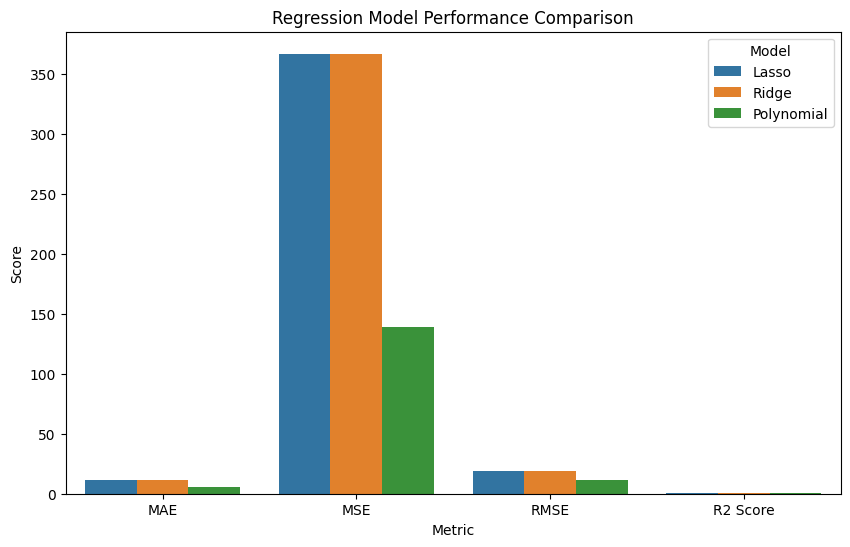

In [62]:
# ---- Collect Regression Metrics ----
results = {
    "Model": ["Lasso", "Ridge", "Polynomial"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_poly)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_poly)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly))
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_poly)
    ]
}

df_metrics = pd.DataFrame(results)

# Melt for seaborn plotting
df_melt = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Value")

# ---- Grouped Bar Plot ----
plt.figure(figsize=(10,6))
sns.barplot(x="Metric", y="Value", hue="Model", data=df_melt)
plt.title("Regression Model Performance Comparison")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()